In [11]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import splitfolders

In [3]:
splitfolders.ratio('Test', output="output1", seed=1337, ratio=(.8, 0.1,0.1))


Copying files: 0 files [00:00, ? files/s]
Copying files: 706 files [00:00, 7057.06 files/s]
Copying files: 1575 files [00:00, 8013.99 files/s]
Copying files: 2377 files [00:00, 7437.33 files/s]
Copying files: 3343 files [00:00, 8274.61 files/s]
Copying files: 4294 files [00:00, 8706.02 files/s]
Copying files: 5205 files [00:00, 8471.58 files/s]
Copying files: 6168 files [00:00, 8832.02 files/s]
Copying files: 7140 files [00:00, 9104.14 files/s]
Copying files: 8055 files [00:00, 8496.81 files/s]
Copying files: 8998 files [00:01, 8766.04 files/s]
Copying files: 9956 files [00:01, 9002.61 files/s]
Copying files: 10864 files [00:01, 8979.90 files/s]
Copying files: 11767 files [00:01, 8194.52 files/s]
Copying files: 12602 files [00:01, 8199.87 files/s]
Copying files: 13507 files [00:01, 8440.32 files/s]
Copying files: 14361 files [00:01, 8347.92 files/s]
Copying files: 15333 files [00:01, 8741.91 files/s]
Copying files: 16214 files [00:01, 8273.54 files/s]
Copying files: 17086 files [00:02

In [1]:
IMAGE_SIZE = 140
CHANNELS = 3

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True
)
train_generator = train_datagen.flow_from_directory(
        'output2/train',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse",
        #save_to_dir="AugmentedImages"
)

2024-02-11 20:57:17.885049: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 20:57:17.885125: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 20:57:18.468041: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-11 20:57:19.607921: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-11 20:57:23.040970: W tensorflow/compiler/tf2

Found 551769 images belonging to 520 classes.


In [3]:
train_generator.class_indices

{'10197 Technic, Axle and Pin Connector Hub with 2 Perpendicular Axles': 0,
 '10201 Bracket 1 x 2 - 1 x 4 with Rounded Corners': 1,
 '10247 Plate Special 2 x 2 with 1 Pin Hole [Complete Underside Rib]': 2,
 '10314 Slope, Curved 1 x 4 x 1 13': 3,
 '10928 Technic, Gear 8 Tooth with Dual Face': 4,
 '11090 Bar Holder with Clip': 5,
 '11153 Slope, Curved 4 x 1': 6,
 '11211 Brick, Modified 1 x 2 with Studs on 1 Side': 7,
 '11212 Plate 3 x 3': 8,
 '11213 Plate, Round 6 x 6 with Hole': 9,
 '11214 Technic, Axle 1L with Pin 2L with Friction Ridges': 10,
 '11215 Bracket 5 x 2 x 1 13 with 2 Holes': 11,
 '11272 Technic, Axle Connector 2 x 3 Quadruple': 12,
 '11458 Plate, Modified 1 x 2 with Pin Hole on Top': 13,
 '11476 Plate, Modified 1 x 2 with Clip on Side (Horizontal Grip)': 14,
 '11477 Slope Curved 2 x 1 No Studs [12 Bow]': 15,
 '11478 Technic, Liftarm Thin 1 x 5 - Axle Holes': 16,
 '120493 Technic Beam 1 x 4 Thin': 17,
 '131673 Technic Axle and Pin Connector Angled #5 - 112.5°': 18,
 '13349 W

In [4]:
class_names = list(train_generator.class_indices.keys())
class_names

['10197 Technic, Axle and Pin Connector Hub with 2 Perpendicular Axles',
 '10201 Bracket 1 x 2 - 1 x 4 with Rounded Corners',
 '10247 Plate Special 2 x 2 with 1 Pin Hole [Complete Underside Rib]',
 '10314 Slope, Curved 1 x 4 x 1 13',
 '10928 Technic, Gear 8 Tooth with Dual Face',
 '11090 Bar Holder with Clip',
 '11153 Slope, Curved 4 x 1',
 '11211 Brick, Modified 1 x 2 with Studs on 1 Side',
 '11212 Plate 3 x 3',
 '11213 Plate, Round 6 x 6 with Hole',
 '11214 Technic, Axle 1L with Pin 2L with Friction Ridges',
 '11215 Bracket 5 x 2 x 1 13 with 2 Holes',
 '11272 Technic, Axle Connector 2 x 3 Quadruple',
 '11458 Plate, Modified 1 x 2 with Pin Hole on Top',
 '11476 Plate, Modified 1 x 2 with Clip on Side (Horizontal Grip)',
 '11477 Slope Curved 2 x 1 No Studs [12 Bow]',
 '11478 Technic, Liftarm Thin 1 x 5 - Axle Holes',
 '120493 Technic Beam 1 x 4 Thin',
 '131673 Technic Axle and Pin Connector Angled #5 - 112.5°',
 '13349 Wedge 4 x 4 Triple Inverted with Connections between 4 Studs',
 '13

In [5]:
for image_batch, label_batch in train_generator:
#     print(label_batch)
    print(image_batch[0])
    break

[[[0.627451   0.6313726  0.61960787]
  [0.627451   0.6313726  0.61960787]
  [0.627451   0.6313726  0.61960787]
  ...
  [0.6        0.6        0.5882353 ]
  [0.6        0.6        0.5882353 ]
  [0.6        0.5975749  0.5882353 ]]

 [[0.627451   0.6313726  0.61960787]
  [0.627451   0.6313726  0.61960787]
  [0.627451   0.6313726  0.61960787]
  ...
  [0.6        0.6        0.5882353 ]
  [0.6        0.6        0.5882353 ]
  [0.6        0.5969297  0.5882353 ]]

 [[0.627451   0.6313726  0.61960787]
  [0.627451   0.6313726  0.61960787]
  [0.627451   0.6313726  0.61960787]
  ...
  [0.6        0.6        0.5882353 ]
  [0.6        0.6        0.5882353 ]
  [0.6        0.59628457 0.5882353 ]]

 ...

 [[0.59607846 0.6039216  0.6       ]
  [0.59607846 0.6039216  0.6       ]
  [0.59607846 0.6039216  0.6       ]
  ...
  [0.51352715 0.51362634 0.5057832 ]
  [0.5122367  0.5129811  0.505138  ]
  [0.5109464  0.51233596 0.5044928 ]]

 [[0.59607846 0.6039216  0.6       ]
  [0.59607846 0.6039216  0.6       ]


In [6]:
validation_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
validation_generator = validation_datagen.flow_from_directory(
        'output2/val',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 68765 images belonging to 520 classes.


In [7]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10,
        horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(
        'output2/test',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        batch_size=32,
        class_mode="sparse"
)

Found 69418 images belonging to 520 classes.


In [8]:
for image_batch, label_batch in test_generator:
    print(image_batch[0])
    break

[[[0.86274517 0.86274517 0.86274517]
  [0.86274517 0.86274517 0.86274517]
  [0.86274517 0.86274517 0.86274517]
  ...
  [0.8583757  0.8583757  0.8583757 ]
  [0.8578277  0.8578277  0.8578277 ]
  [0.85727984 0.85727984 0.85727984]]

 [[0.86274517 0.86274517 0.86274517]
  [0.86274517 0.86274517 0.86274517]
  [0.86274517 0.86274517 0.86274517]
  ...
  [0.854902   0.854902   0.854902  ]
  [0.854902   0.854902   0.854902  ]
  [0.854902   0.854902   0.854902  ]]

 [[0.86274517 0.86274517 0.86274517]
  [0.86274517 0.86274517 0.86274517]
  [0.86274517 0.86274517 0.86274517]
  ...
  [0.8552729  0.8552729  0.8552729 ]
  [0.8558209  0.8558209  0.8558209 ]
  [0.85636884 0.85636884 0.85636884]]

 ...

 [[0.82745105 0.82745105 0.82745105]
  [0.82745105 0.82745105 0.82745105]
  [0.82745105 0.82745105 0.82745105]
  ...
  [0.83921576 0.83921576 0.83921576]
  [0.83921576 0.83921576 0.83921576]
  [0.83921576 0.83921576 0.83921576]]

 [[0.82745105 0.82745105 0.82745105]
  [0.82745105 0.82745105 0.82745105]


In [13]:
input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 520

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [14]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 138, 138, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 69, 69, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 67, 67, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 33, 33, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 31, 31, 64)        36928     
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 64)       

In [15]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [48]:
history = model.fit(
    train_generator,
    steps_per_epoch=4371,
    batch_size=32,
    validation_data=validation_generator,
    validation_steps=540,
    verbose=1,
    epochs=30,
)

Epoch 1/30
4371/4371 [==============================] - 813s 186ms/step - loss: 3.4802 - accuracy: 0.1453 - val_loss: 2.5789 - val_accuracy: 0.2897
Epoch 2/30
4371/4371 [==============================] - 811s 186ms/step - loss: 2.2614 - accuracy: 0.3632 - val_loss: 2.0194 - val_accuracy: 0.4170
Epoch 3/30
4371/4371 [==============================] - 813s 186ms/step - loss: 1.8599 - accuracy: 0.4553 - val_loss: 1.7068 - val_accuracy: 0.4929
Epoch 4/30
4371/4371 [==============================] - 814s 186ms/step - loss: 1.6081 - accuracy: 0.5171 - val_loss: 1.5117 - val_accuracy: 0.5398
Epoch 5/30
4371/4371 [==============================] - 812s 186ms/step - loss: 1.4460 - accuracy: 0.5586 - val_loss: 1.4104 - val_accuracy: 0.5661
Epoch 6/30
4371/4371 [==============================] - 813s 186ms/step - loss: 1.3390 - accuracy: 0.5878 - val_loss: 1.3136 - val_accuracy: 0.5916
Epoch 7/30
4371/4371 [==============================] - 814s 186ms/step - loss: 1.2612 - accuracy: 0.6082 - val_

In [49]:
scores = model.evaluate(test_generator)

549/549 [==============================] - 93s 170ms/step - loss: 0.9190 - accuracy: 0.7092


In [50]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

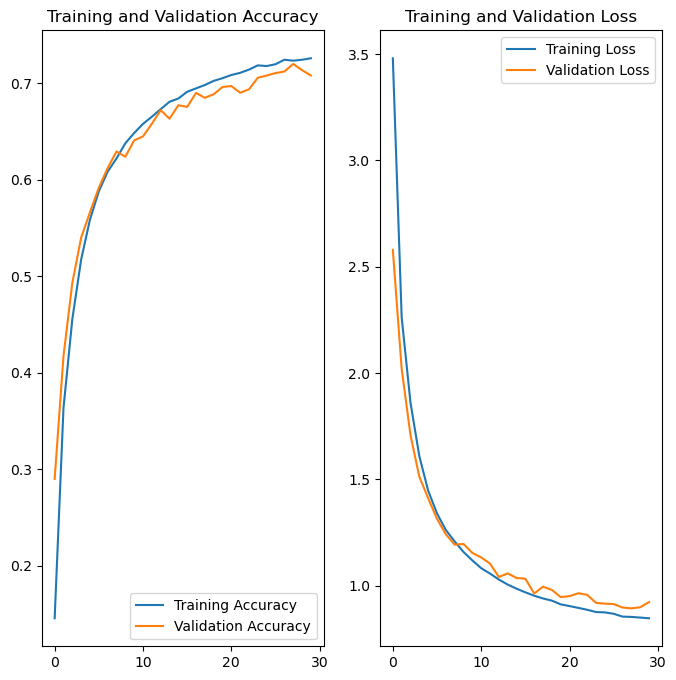

In [51]:
EPOCHS = 30

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: 3659 Arch 1 x 4
1/1 [==============================] - 0s 78ms/step
predicted label: 3659 Arch 1 x 4


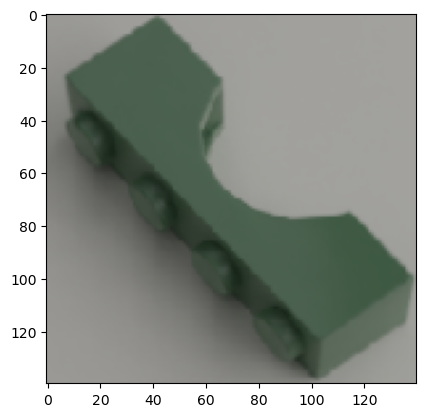

In [52]:
import numpy as np


for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    break

In [2]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [3]:
test_generator

NameError: name 'test_generator' is not defined

In [4]:
plt.figure(figsize=(20, 20))
for images, labels in test_generator.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

NameError: name 'plt' is not defined

In [5]:
import os
model_version="100Bricks"
model.save(f"./Models/{model_version}")

NameError: name 'model' is not defined